<a href="https://colab.research.google.com/github/amitgundad/Assignment-1/blob/Stud/3_Data_Analysis_using_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mount the google drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

Installing pyspark module

In [ ]:
! pip install pyspark

     |████████████████████████████████| 281.3 MB 36 kB/s 
     |████████████████████████████████| 198 kB 44.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=5bbc845b1a42e253a9ba9951753838d0025f7c40ff7a6b589ba46dcd20ca2b16
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


Importing the modules 

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct 
import matplotlib.pyplot as plts

creating spark session

importing the *Listenings.csv* file: 

In [ ]:
listen_df = spark.read.csv('/content/drive/MyDrive/dataset/listenings.csv', header=True, inferSchema=True)

In [ ]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

In [ ]:
spark

let's check the data:

In [ ]:
listen_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

dropping unnecessary columns:

In [ ]:
listen_df = listen_df.drop('date')

drop the null rows:

In [ ]:
listen_df = listen_df.na.drop()

let's check the dataset again:

In [ ]:
listen_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema: 

In [ ]:
listen_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe: 

In [ ]:
print(listen_df.count(),len(listen_df.columns))

13758905 4


**Query #0:**
select two columns: track and artist

In [ ]:
q0 = listen_df.select('track','artist').show()

+--------------------+---------------+
|               track|         artist|
+--------------------+---------------+
|           Price Tag|       Jessie J|
|Price Tag (Acoust...|       Jessie J|
|Be Mine! (Ballad ...|          Robyn|
|            Acapella|          Kelis|
|   I'm Not Invisible|      The Tease|
|Bounce (Feat NORE...|       MSTRKRFT|
|Don't Stop The Mu...|        Rihanna|
|               ObZen|      Meshuggah|
|   Yama's Messengers|         Gojira|
|On the Brink of E...|   Napalm Death|
|On the Brink of E...|   Napalm Death|
|        In Deference|   Napalm Death|
|      Post(?)organic|    Decapitated|
|        Mind Feeders|   Dom & Roland|
|Necrosadistic War...|Cannibal Corpse|
|     Dance All Night|   Dom & Roland|
|          Late Night|   Dom & Roland|
|          Freak Seen|   Dom & Roland|
|Paradrenasite (Hi...|   Dom & Roland|
|               Rhino|   Dom & Roland|
+--------------------+---------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [ ]:
q1 = listen_df.select('*')
q1 = q1.filter(listen_df.artist == 'Rihanna')
q1 = q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [ ]:
q2 = listen_df.select('*')
q2 = q2.filter(listen_df.artist == 'Rihanna')
q2 = q2.groupby('user_id')
q2 = q2.agg(count('user_id').alias('Count'))
q2 = q2.orderBy(desc('Count')).limit(10)
q2.show()

+---------------+-----+
|        user_id|Count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

find top 10 famous tracks 

In [ ]:
q3 = listen_df.select('track','artist')
q3 = q3.groupby('track','artist').agg(count('*').alias('Count'))
q3 = q3.orderBy(desc('Count')).limit(10)
q3 = q3.show()

+----------------+--------------+-----+
|           track|        artist|Count|
+----------------+--------------+-----+
|           Sorry| Justin Bieber| 3381|
|Do I Wanna Know?|Arctic Monkeys| 2865|
|     Skinny Love|      Bon Iver| 2836|
|      PILLOWTALK|          Zayn| 2701|
|   Mr Brightside|   The Killers| 2690|
|            Work|       Rihanna| 2646|
|         Pompeii|      Bastille| 2606|
| Little Lion Man|Mumford & Sons| 2520|
|        The Cave|Mumford & Sons| 2485|
|   Love Yourself| Justin Bieber| 2481|
+----------------+--------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [ ]:
q4 = listen_df.select('track','artist').filter(listen_df.artist == 'Rihanna')
q4 = q4.groupby('track','artist').agg(count('*').alias('Count'))
q4 = q4.orderBy(desc('Count')).limit(10)
q4 = q4.show()

+--------------------+-------+-----+
|               track| artist|Count|
+--------------------+-------+-----+
|                Work|Rihanna| 2646|
|Only Girl (In the...|Rihanna| 1749|
|We Found Love (fe...|Rihanna| 1575|
|                 S&M|Rihanna| 1307|
|            Rude Boy|Rihanna| 1303|
|            Diamonds|Rihanna| 1224|
|      Kiss it Better|Rihanna|  945|
| Where Have You Been|Rihanna|  844|
|Cheers (Drink to ...|Rihanna|  697|
|           Desperado|Rihanna|  679|
+--------------------+-------+-----+



**Query #5:**

find top 10 famous albums 

In [ ]:
q5 = listen_df.select('artist','album')
q5 = q5.groupby('artist','album').agg(count('*').alias('Count'))
q5 = q5.orderBy(desc('Count')).limit(10)
q5 = q5.show()

+--------------------+--------------------+-----+
|              artist|               album|Count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



importing the ***genre.csv*** file:

In [ ]:
genre_df = spark.read.csv('/content/drive/MyDrive/dataset/genre.csv', header=True, inferSchema=True)

let's check the data

In [ ]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



In [ ]:
listen_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

Let's inner join these two data frames

In [ ]:
data = listen_df.join(genre_df,on='artist',how='inner')
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

find top 10 users who are fan of ***pop*** music

In [ ]:
q6 = data.select('user_id')
q6 = q6.filter(data.genre == 'pop')
q6 = q6.groupby('user_id')
q6 = q6.agg(count('*').alias('Count'))
q6 = q6.orderBy(desc('Count'))
q6 = q6.limit(10)
q6 = q6.show()

+---------------+-----+
|        user_id|Count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [ ]:
q7 = data.select('genre')
q7 = q7.groupby('genre')
q7 = q7.agg(count('*').alias('Count'))
q7 = q7.orderBy(desc('Count'))
q7 = q7.limit(10)
q7 = q7.show()

+----------+-------+
|     genre|  Count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



**Query #8**

find out each user favourite genre

In [ ]:
q8_1 = data.select('user_id','genre')
q8_1 = q8_1.groupby('user_id','genre')
q8_1 = q8_1.agg(count('*').alias('Count'))
q8_1 = q8_1.orderBy('user_id')
q8_1.show()

+-------+--------------------+-----+
|user_id|               genre|Count|
+-------+--------------------+-----+
| --Seph|               Bjorn|    8|
| --Seph| brazilian pop music|    1|
| --Seph| Snoop Dogg & Dev...|    4|
| --Seph|        instrumental|    1|
| --Seph|   Vladimir Spivakov|    1|
| --Seph|               samba|    2|
| --Seph|             ambient|    6|
| --Seph| Sara Mingardo & ...|    1|
| --Seph|             baroque|    1|
| --Seph|     Hilko Schomerus|    1|
| --Seph|      Kendrick Lamar|    4|
| --Seph|             hip hop|    7|
| --Seph|          electronic|    6|
| --Seph|                rock|   27|
| --Seph| London Symphony ...|    1|
| --Seph|                fado|    1|
| --Seph|          soundtrack|    1|
| --Seph|              techno|    3|
| --Seph|          french pop|    1|
| --Seph|      Alice Sara Ott|    2|
+-------+--------------------+-----+
only showing top 20 rows



In [ ]:
q8_2 = q8_1.groupby('user_id')
q8_2 = q8_2.agg(max(struct(col('Count'), col('genre'))).alias('max'))
q8_2 = q8_2.select(col('user_id'),col('max.genre'))
q8_2.show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|       --ollz--|       rock|
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
|        -Hazel-|   synthpop|
|        -Heiko-| electronic|
|         -Katie|      lo-fi|
|      -Krystal-|       rock|
|         -Mark-| indie rock|
|       -Mullet-|  metalcore|
|          -Robs|       rock|
| -SleepingStar-|black metal|
|      -Stifler-|       rock|
|  -Toxic-Waste-|  aggrotech|
+---------------+-----------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart 

In [ ]:
q9 = genre_df.select('genre')
q9 = q9.filter((col('genre')=='pop') | (col('genre') == 'rock') | (col('genre') == 'metal') | (col('genre') == 'hip hop'))
q9 = q9.groupby('genre')
q9 = q9.agg(count('genre').alias('Count'))
q9.show()

+-------+-----+
|  genre|Count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [ ]:
q9_list = q9.collect()

In [ ]:
labels = [row['genre'] for row in q9_list]
counts = [row['Count'] for row in q9_list]

In [ ]:
print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


now lets visualize these two lists using a bar chart

<BarContainer object of 4 artists>

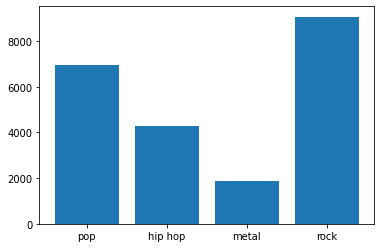

In [ ]:
plts.bar(labels,counts)